<a href="https://colab.research.google.com/github/ankitchaahat/polynomial_regression_temp_predict/blob/main/polynomial_regression_bhubneshwar_temp_prediction_july_to_august_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

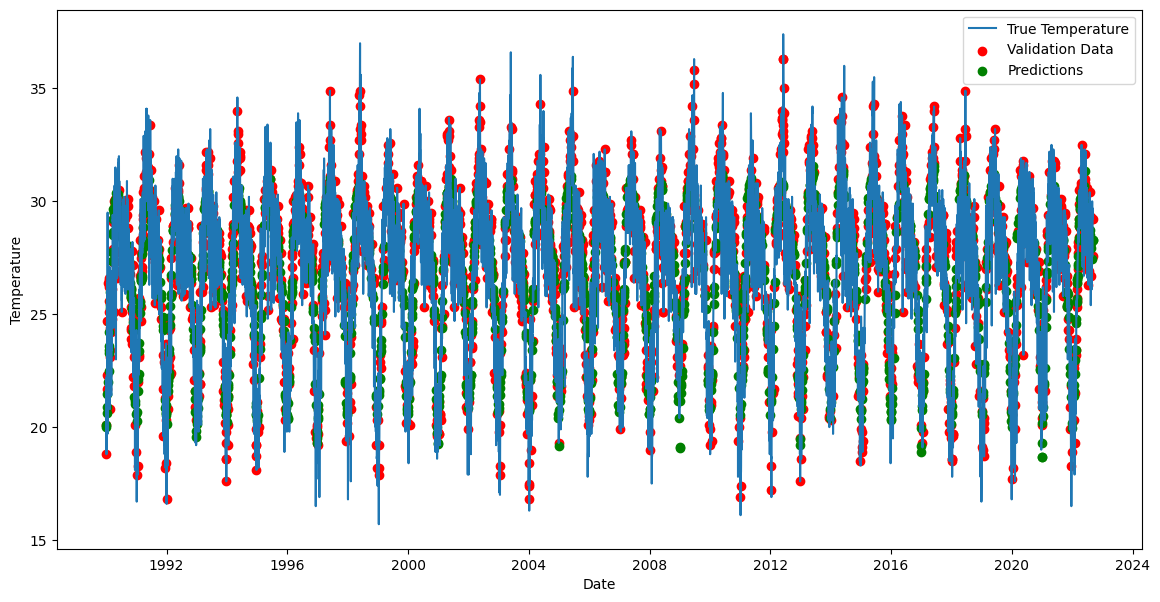

,time,Year,Month,Day,DayOfYear,Temperature
0,2024-07-15,2024,7,15,197,29.073028
1,2024-07-16,2024,7,16,198,29.047656
2,2024-07-17,2024,7,17,199,29.016440
3,2024-07-18,2024,7,18,200,28.980192
4,2024-07-19,2024,7,19,201,28.940014


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Load the dataset
file_path = '/content/weather_Bhubhneshwar_1990_2022.csv'
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Drop rows with missing target values
df = df.dropna(subset=['tavg'])

# Extract features
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['Day'] = df['time'].dt.day
df['DayOfYear'] = df['time'].dt.dayofyear

# We'll use the 'tavg' column as the target variable
X = df[['Year', 'Month', 'Day', 'DayOfYear']]
y = df['tavg']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Predict on the validation set
y_val_pred = model.predict(X_val_poly)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='True Temperature')
plt.scatter(df.loc[X_val.index, 'time'], y_val, color='red', label='Validation Data')
plt.scatter(df.loc[X_val.index, 'time'], y_val_pred, color='green', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Generate dates for July 15 to September 15, 2024
future_dates = pd.date_range(start='2024-07-15', end='2024-09-15')
future_df = pd.DataFrame({'time': future_dates})
future_df['Year'] = future_df['time'].dt.year
future_df['Month'] = future_df['time'].dt.month
future_df['Day'] = future_df['time'].dt.day
future_df['DayOfYear'] = future_df['time'].dt.dayofyear

# Prepare features
X_future = poly.transform(future_df[['Year', 'Month', 'Day', 'DayOfYear']])

# Predict future temperatures
future_df['Temperature'] = model.predict(X_future)

# Display the predictions
future_df.head()


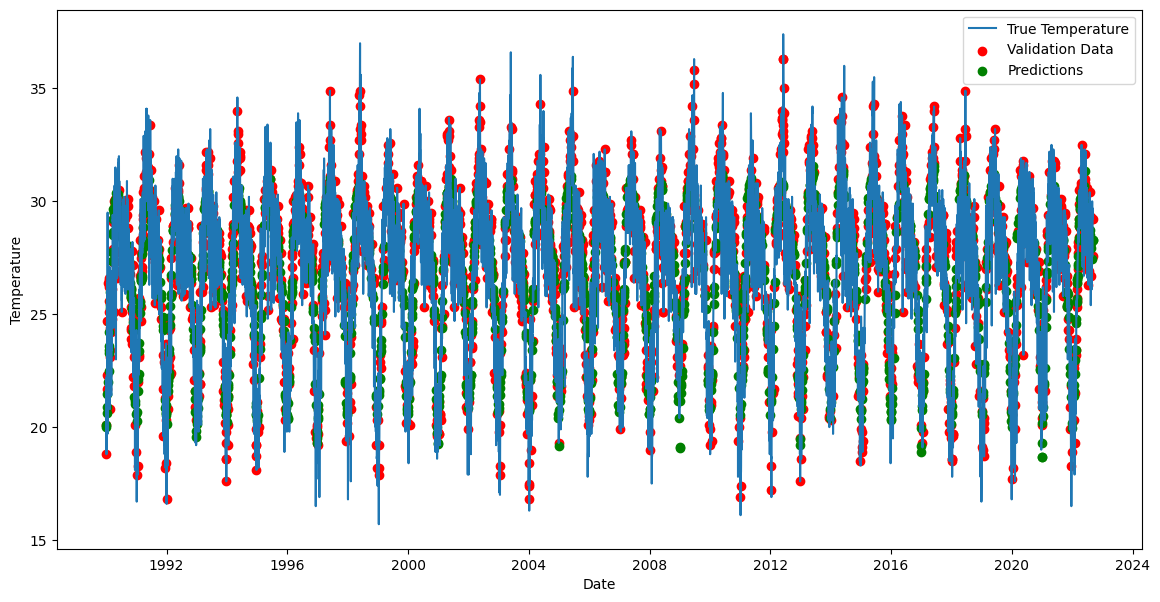

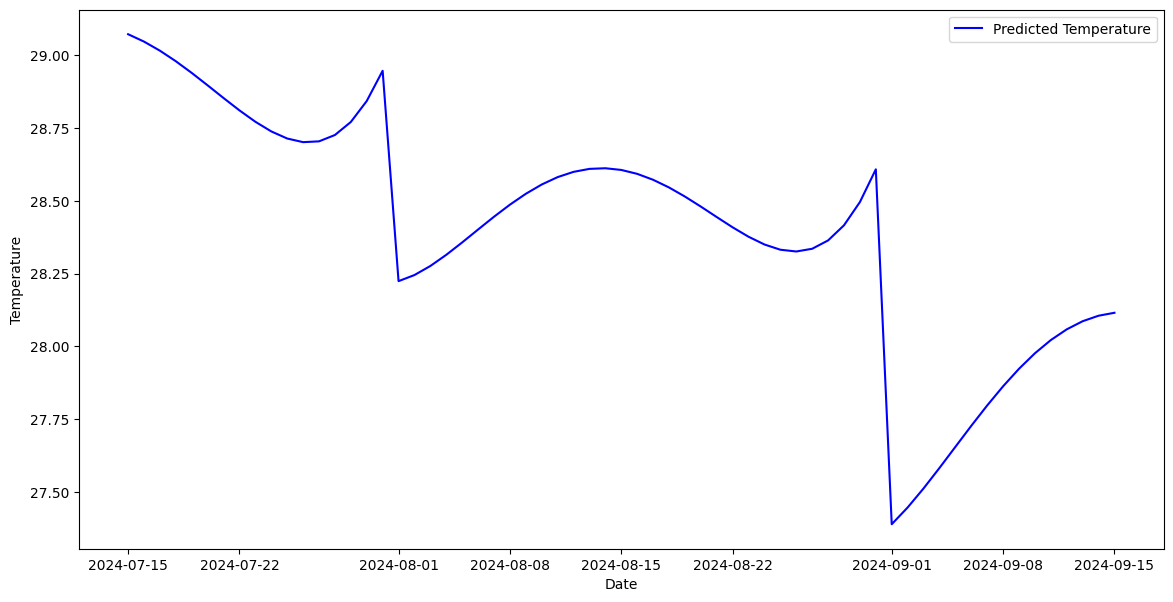

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Load the dataset
file_path = '/content/weather_Bhubhneshwar_1990_2022.csv'
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Drop rows with missing target values
df = df.dropna(subset=['tavg'])

# Extract features
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['Day'] = df['time'].dt.day
df['DayOfYear'] = df['time'].dt.dayofyear

# We'll use the 'tavg' column as the target variable
X = df[['Year', 'Month', 'Day', 'DayOfYear']]
y = df['tavg']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Predict on the validation set
y_val_pred = model.predict(X_val_poly)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='True Temperature')
plt.scatter(df.loc[X_val.index, 'time'], y_val, color='red', label='Validation Data')
plt.scatter(df.loc[X_val.index, 'time'], y_val_pred, color='green', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Generate dates for July 15 to September 15, 2024
future_dates = pd.date_range(start='2024-07-15', end='2024-09-15')
future_df = pd.DataFrame({'time': future_dates})
future_df['Year'] = future_df['time'].dt.year
future_df['Month'] = future_df['time'].dt.month
future_df['Day'] = future_df['time'].dt.day
future_df['DayOfYear'] = future_df['time'].dt.dayofyear

# Prepare features
X_future = poly.transform(future_df[['Year', 'Month', 'Day', 'DayOfYear']])

# Predict future temperatures
future_df['Temperature'] = model.predict(X_future)

# Display the predictions
future_df.head()

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_df['time'], future_df['Temperature'], label='Predicted Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
